In [ ]:
import os
import cv2
import random
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from utils.DiffusionUtils import DiffusionUtils
from utils.TemplateManager import TemplateManager
from utils.exp_utils import list_exp_names, list_concept_names

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [2]:
dataset_name = "v2_sub"
exp_names = list_exp_names(dataset_name)
cpt_names = list_concept_names(dataset_name)

===== Experiment names for v2_sub: =====
20250330_instree_origin
20250331_attn_mask
20250401_attn_mask_no_otsu
20250402_attn_mask_hybrid_loss(wrong)
20250404_hybrid_loss_correct
20250405_attn_mask_union_sampling
20250407_attn_mask_union_sampling_0.9
20250408_0407_no_otsu
20250409_0408_rand_0.95
20250410_0408_hybrid
20250411_all_res
20250412_real_all_res
===== Total experiments: 12 =====
===== Concept names for v2_sub: =====
buddha
canada_bear
cat_statue
colorful_teapot
decoritems_woodenpot
elephant
green_dall
mug_buildings
mug_skulls
physics_mug
plushie_tortoise
red_teapot
round_bird
===== Total concepts: 13 =====


In [ ]:
exp_name = "20250410_0408_hybrid"
exp_path = f"/home/jack/Code/Research/instree_analysis/experiments/{dataset_name}/{exp_name}"
cpt_name = "red_teapot"

origin_img_path = f"{exp_path}/input_concepts/{cpt_name}/v0/"
img_names = os.listdir(origin_img_path)
if ".DS_Store" in img_names:
    img_names.remove(".DS_Store")
origin_img_path += random.choice(img_names)
print(f"origin_img_path: {origin_img_path}")

concept_path = f"{exp_path}/outputs/{cpt_name}/v0/learned_embeds.bin"
concept_path = f"{exp_path}/outputs/{cpt_name}/v0/v0_seed111/learned_embeds.bin"
concepts = torch.load(concept_path)
DiffusionUtils.reset_vocab()
DiffusionUtils.add_new_vocab('<*>', concepts['<*>'])
DiffusionUtils.add_new_vocab('<&>', concepts['<&>'])

origin_img_path: /home/jack/Code/Research/instree_analysis/experiments/v2_sub/20250410_0408_hybrid/input_concepts/red_teapot/v0/4.jpeg
Vocabulary has been reset.
Current vocab size:  49408
New token added:  <*>
Current vocab size:  49409
All new tokens:  {'<*>': 49408}
New token added:  <&>
Current vocab size:  49410
All new tokens:  {'<*>': 49408, '<&>': 49409}


In [ ]:
paper_concept_path = "/home/jack/Code/Research/instree_main/assets/paper_tokens.bin"
paper_concepts = torch.load(paper_concept_path)
print(paper_concepts.keys())
DiffusionUtils.reset_vocab()

for cpt in paper_concepts.keys():
    DiffusionUtils.add_new_vocab(f"<{cpt}_v1>", paper_concepts[cpt][f"<{cpt}_v1>"])
    DiffusionUtils.add_new_vocab(f"<{cpt}_v2>", paper_concepts[cpt][f"<{cpt}_v2>"])

dict_keys(['cat', 'bear', 'buddha', 'mug', 'teapot', 'round_bird', 'elephant', 'wooden_pot', 'physics_mug', 'red_teapot', 'mug_buildings'])
Vocabulary has been reset.
Current vocab size:  49408
New token added:  <cat_v1>
Current vocab size:  49409
All new tokens:  {'<cat_v1>': 49408}
New token added:  <cat_v2>
Current vocab size:  49410
All new tokens:  {'<cat_v1>': 49408, '<cat_v2>': 49409}
New token added:  <bear_v1>
Current vocab size:  49411
All new tokens:  {'<cat_v1>': 49408, '<cat_v2>': 49409, '<bear_v1>': 49410}
New token added:  <bear_v2>
Current vocab size:  49412
All new tokens:  {'<cat_v1>': 49408, '<cat_v2>': 49409, '<bear_v1>': 49410, '<bear_v2>': 49411}


Prompt: a photo of the clean <bear_v1>


  0%|          | 0/25 [00:00<?, ?it/s]

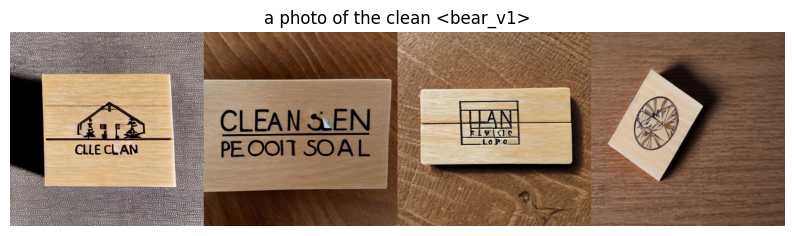

Prompt: a photo of the clean <bear_v2>


  0%|          | 0/25 [00:00<?, ?it/s]

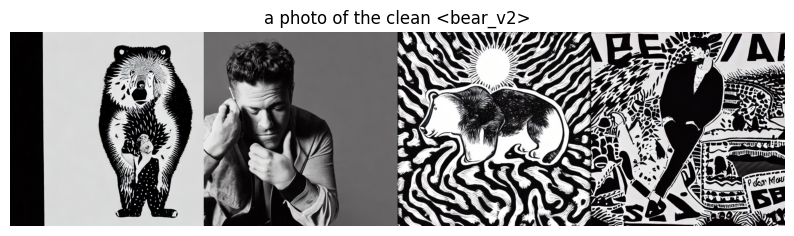

Prompt: a photo of the clean <bear_v1> <bear_v2>


  0%|          | 0/25 [00:00<?, ?it/s]

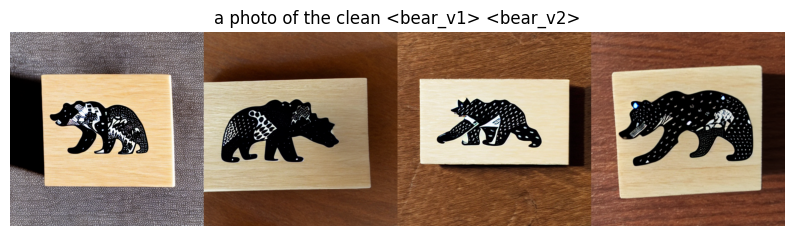

In [5]:
prompt_tmp = TemplateManager.get_random_template("IMG")
DiffusionUtils.run_prompt(prompt_tmp.format("<bear_v1>"), 4)
DiffusionUtils.run_prompt(prompt_tmp.format("<bear_v2>"), 4)
DiffusionUtils.run_prompt(prompt_tmp.format("<bear_v1> <bear_v2>"), 4)

canada_bear /home/jack/Code/Research/instree_analysis/experiments/v2/20250328_instree_original


  0%|          | 0/25 [00:00<?, ?it/s]

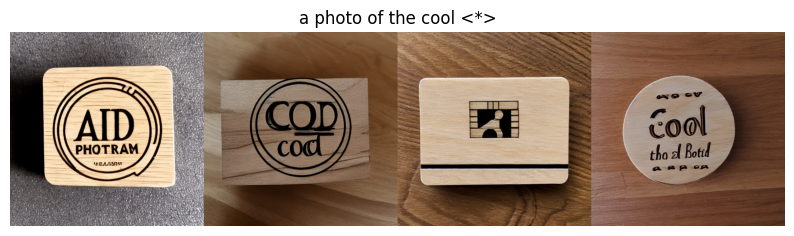

  0%|          | 0/25 [00:00<?, ?it/s]

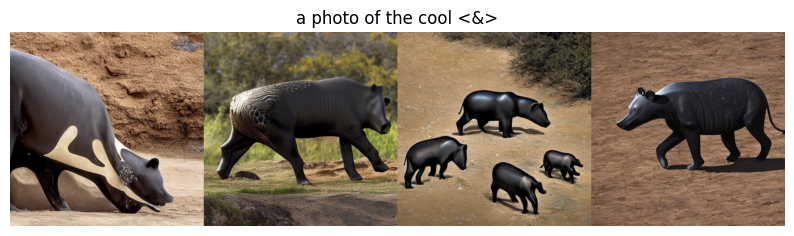

  0%|          | 0/25 [00:00<?, ?it/s]

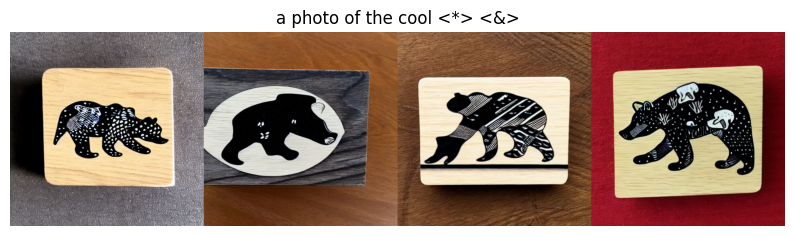

In [ ]:
prompt_tmp = TemplateManager.get_random_template("IMG")
DiffusionUtils.run_prompt(prompt_tmp.format("<>"), 4)
DiffusionUtils.run_prompt(prompt_tmp.format("<&>"), 4)
DiffusionUtils.run_prompt(prompt_tmp.format("<*> <&>"), 4)

In [ ]:
def cmp_two_exp(exp1, exp2, concept):

    # Get the input image
    print(exp1, exp2)
    print("Assuming same input image, using exp1 input image...")
    print("=" * 100)
    origin_img_path = f"{exp1}/input_concepts/{concept}/v0/"
    img_list = []
    for img in os.listdir(origin_img_path):
        if img == '.DS_Store':
            continue
        img_path = os.path.join(origin_img_path, img)
        img = cv2.imread(img_path)
        h, w, _ = img.shape
        if h > w:
            img = img[int((h-w)/2):int((h+w)/2), :, :]
        else:
            img = img[:, int((w-h)/2):int((w+h)/2), :]
        img = cv2.resize(img, (512, 512))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list.append(img)

    if img_list:
        img_list = np.array(img_list)
        img_list = np.concatenate(img_list, axis=1)  
        img_list = Image.fromarray(img_list)

        plt.figure(figsize=(12, 6))
        plt.imshow(img_list)
        plt.axis("off")
        plt.show()
    else:
        print("No valid images found in the folder.")

    # Load the learned embeddings
    prompt_tmp = TemplateManager.get_random_template("IMG")
    for exp_path in exp1, exp2:
        print(exp_path)
        print("=" * 100)
        concept_base_path = f"{exp_path}/outputs/{concept}/v0"
        try:
            concept_path = f"{concept_base_path}/learned_embeds.bin"
            concepts = torch.load(concept_path)
        except:
            seed_path = os.listdir(concept_base_path)
            concept_path = f"{concept_base_path}/{seed_path[0]}/learned_embeds.bin"
            concepts = torch.load(concept_path)

        DiffusionUtils.reset_vocab()
        DiffusionUtils.add_new_vocab('<*>', concepts['<*>'])
        DiffusionUtils.add_new_vocab('<&>', concepts['<&>'])

        DiffusionUtils.run_prompt(prompt_tmp.format("<*>"), 4)
        DiffusionUtils.run_prompt(prompt_tmp.format("<&>"), 4)
        DiffusionUtils.run_prompt(prompt_tmp.format("<*> <&>"), 4)


/home/jack/Code/Research/instree_analysis/experiments/v2_sub/20250330_instree_origin /home/jack/Code/Research/instree_analysis/experiments/v2_sub/20250411_all_res
Assuming same input image, using exp1 input image...


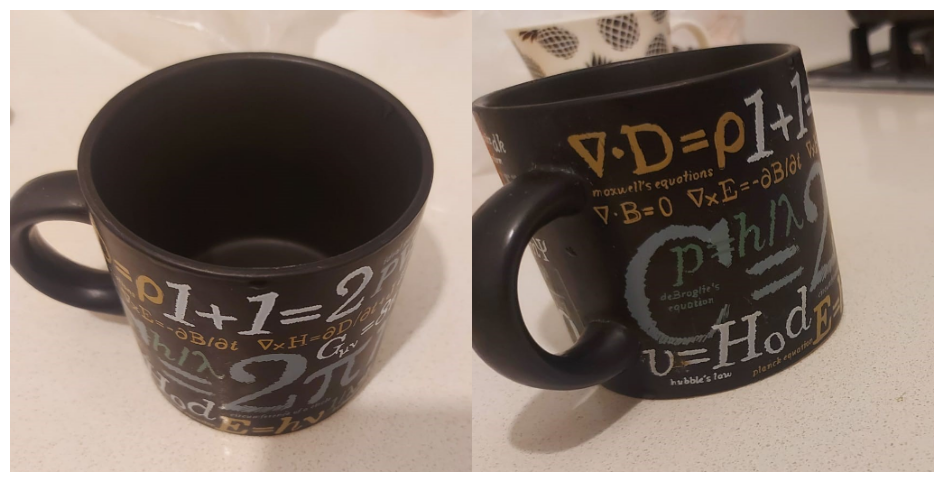

/home/jack/Code/Research/instree_analysis/experiments/v2_sub/20250411_all_res
Vocabulary has been reset.
Current vocab size:  49408
New token added:  <*>
Current vocab size:  49409
All new tokens:  {'<*>': 49408}
New token added:  <&>
Current vocab size:  49410
All new tokens:  {'<*>': 49408, '<&>': 49409}


  0%|          | 0/25 [00:00<?, ?it/s]

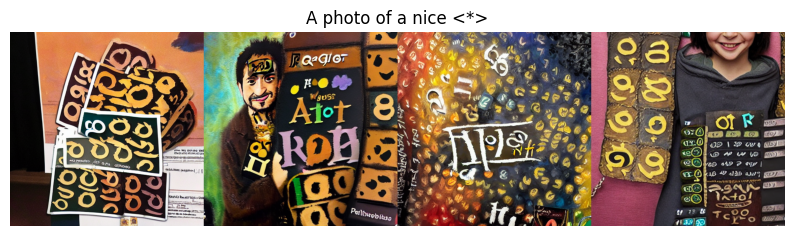

  0%|          | 0/25 [00:00<?, ?it/s]

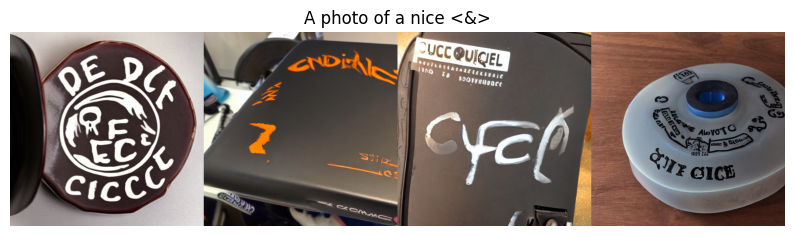

  0%|          | 0/25 [00:00<?, ?it/s]

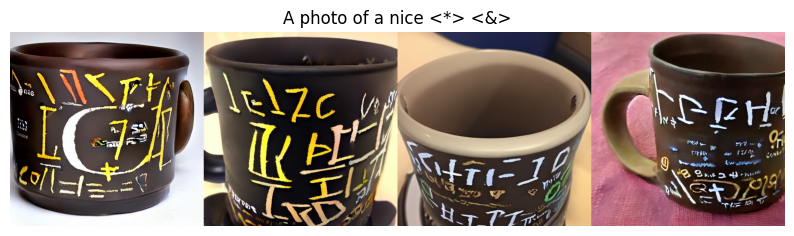

In [ ]:
dataset_name = "v2_sub"
cpt_name = "physics_mug"
exp1_name = "20250330_instree_origin"
exp2_name = "20250411_all_res"
exp1_path = f"/home/jack/Code/Research/instree_analysis/experiments/{dataset_name}/{exp1_name}"
exp2_path = f"/home/jack/Code/Research/instree_analysis/experiments/{dataset_name}/{exp2_name}"
cmp_two_exp(exp1_path, exp2_path, cpt_name)